In [214]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from IPython.display import display 
import pylab
from sklearn.compose import ColumnTransformer
import sklearn
import keras.layers as kl
from sklearn.utils import shuffle
import keras

In [215]:
df_arsenic_prelim = pd.read_csv (r'C:\Users\Ryan\Desktop\Summer research\Data\Prelim-data\as.csv')

In [216]:
df_arsenic_prelim

,SiteID,As,X_Albers,Y_Albers,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,...,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,Data,as10,Pred
0,1,6.0,924000.0,2006000.0,105.912831,16.678065,48.483771,0.141277,5.384314,21.0,...,143.362904,9.902970,5.956547,0.304000,23.158235,17.689265,3.082386,train,0.0,0.00
1,2,1.0,892000.0,2080000.0,54.861323,7.688502,50.638261,0.217775,7.311919,37.0,...,137.152244,9.067347,4.196766,0.343552,22.015855,17.739371,3.076582,train,0.0,0.06
2,3,13.0,886000.0,2066000.0,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,...,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,train,1.0,0.83
3,4,1.0,898000.0,2076000.0,59.737885,4.900404,34.132068,0.154753,5.318469,37.0,...,298.232568,9.815662,1.231952,0.328985,27.709500,17.589893,1.044807,train,0.0,0.03
4,5,2.0,896000.0,2062000.0,45.717769,6.511748,45.355325,0.140200,5.400000,28.0,...,97.123320,9.435353,21.539828,0.268193,19.238581,14.557619,8.535328,train,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,1.0,610000.0,2484000.0,19.506248,8.030330,10.843744,0.159466,4.090000,59.0,...,115.224598,13.790910,0.416030,0.344196,8.765928,16.686542,0.188501,test,0.0,0.11
9998,9999,6.0,616000.0,2526000.0,24.992380,0.158934,0.199489,0.126106,4.030000,63.0,...,40.882361,11.154347,1.048951,0.253424,15.627269,11.281490,1.518130,test,0.0,0.01
9999,10000,0.0,602000.0,2586000.0,26.211521,0.004975,0.015434,0.126106,4.030000,66.0,...,59.112810,13.113131,0.520421,0.280687,21.815356,15.832110,0.643534,test,0.0,0.05
10000,10001,0.0,668000.0,2620000.0,12.496190,0.028986,0.058744,0.066700,2.000000,62.0,...,59.639661,12.550000,0.098656,0.367925,5.079691,14.141643,0.114506,test,0.0,0.01


In [217]:
df_arsenic_prelim.isnull().values.any()
df_arsenic_prelim.isnull().sum()
df_arsenic_prelim = df_arsenic_prelim.dropna()

In [218]:
df_arsenic_prelim.shape

(7616, 87)

In [219]:
df_10_to_25 = pd.DataFrame()
df_25_to_50 = pd.DataFrame()
df_50_to_100 = pd.DataFrame()
df_above_100 = pd.DataFrame()
for i in range(df_arsenic_prelim.shape[0]):
    val = df_arsenic_prelim.iloc[i]['As']
    if 10 < val < 25:
        df_10_to_25 = df_10_to_25.append(df_arsenic_prelim.iloc[i])
    elif 25 < val < 50:
        df_25_to_50 = df_25_to_50.append(df_arsenic_prelim.iloc[i])
    elif 50 < val < 100:
        df_50_to_100 = df_50_to_100.append(df_arsenic_prelim.iloc[i])
    elif val > 100:
        df_above_100 = df_above_100.append(df_arsenic_prelim.iloc[i])    

<ipython-input-219-942cc4b43499>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_10_to_25 = df_10_to_25.append(df_arsenic_prelim.iloc[i])
<ipython-input-219-942cc4b43499>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_50_to_100 = df_50_to_100.append(df_arsenic_prelim.iloc[i])
<ipython-input-219-942cc4b43499>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_25_to_50 = df_25_to_50.append(df_arsenic_prelim.iloc[i])
<ipython-input-219-942cc4b43499>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_10_to_25 = df_10_to_25.append(df_arsenic_prelim.iloc[i])
<ipython-input-219-942cc4b43499>:8: FutureWarning: The frame.append meth

In [220]:
print('Shapes')
print('df_10_to_25:', df_10_to_25.shape)
print('df_25_to_50:', df_25_to_50.shape)
print('df_50_to_100:', df_50_to_100.shape)
print('df_above_100:', df_above_100.shape)

Shapes
df_10_to_25: (617, 87)
df_25_to_50: (232, 87)
df_50_to_100: (78, 87)
df_above_100: (8, 87)


In [221]:
df_balanced_1 = pd.DataFrame()
#2,3,5,25

df_balanced_1 = df_balanced_1.append([df_10_to_25]*5)
df_balanced_1 = df_balanced_1.append([df_25_to_50]*8)
df_balanced_1 = df_balanced_1.append([df_50_to_100]*10)
df_balanced_1 = df_balanced_1.append([df_above_100]*30)
df_balanced_1.shape

<ipython-input-221-d2dab244f3f6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_1 = df_balanced_1.append([df_10_to_25]*5)
<ipython-input-221-d2dab244f3f6>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_1 = df_balanced_1.append([df_25_to_50]*8)
<ipython-input-221-d2dab244f3f6>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_1 = df_balanced_1.append([df_50_to_100]*10)
<ipython-input-221-d2dab244f3f6>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_1 = df_balanced_1.append([df_above_100]*30)


(5961, 87)

In [222]:
df_balanced_1

,SiteID,As,X_Albers,Y_Albers,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,...,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,Data,as10,Pred
2,3,13.0,886000.0,2066000.0,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,...,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,train,1.0,0.83
56,3,14.0,838000.0,2058000.0,55.775678,25.739285,59.777201,0.155308,4.660000,46.0,...,270.735863,9.848958,3.451647,0.283160,20.659734,17.304256,3.546806,train,1.0,0.72
58,3,14.0,852000.0,2060000.0,62.480951,24.086462,55.938680,0.146762,5.080784,47.0,...,116.548961,9.808163,6.727938,0.256678,25.487637,16.523225,6.246579,train,1.0,0.86
73,3,20.0,872000.0,2120000.0,26.821091,19.214488,49.705075,0.103134,3.239200,67.0,...,309.981957,10.011000,3.760686,0.252461,10.411219,16.206637,5.168996,train,1.0,0.68
78,3,15.0,858000.0,2112000.0,30.478513,22.268073,57.604260,0.150470,5.520000,66.0,...,181.613303,9.161616,11.476359,0.251809,6.260919,14.962004,8.805068,train,1.0,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,3,128.0,-90000.0,2566000.0,18.287108,2.216946,63.306051,0.097286,3.050000,34.0,...,284.990701,11.373999,4.719260,0.255643,13.436427,21.904810,2.946778,train,1.0,0.98
5048,3,225.0,1098000.0,2044000.0,16.153612,6.167275,85.076774,0.131609,4.604000,26.0,...,145.175903,9.927273,8.820678,0.331771,31.908611,21.329399,2.657673,train,1.0,0.76
6601,3,127.0,694000.0,2104000.0,4.571777,0.093395,1.171012,0.122901,3.750000,32.0,...,665.344727,12.974747,0.511656,0.335629,8.738865,13.505758,0.706900,train,1.0,0.83
7554,3,280.0,-1932000.0,3052000.0,10.057909,17.430244,8.945573,0.186081,5.640000,51.0,...,116.671220,10.220000,2.440301,0.366358,7.113931,10.557549,3.514776,train,1.0,0.95


In [223]:
df_arsenic_prelim = df_arsenic_prelim.append(df_balanced_1)
df_arsenic_prelim = shuffle(df_arsenic_prelim)

<ipython-input-223-1a49d42fd677>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_arsenic_prelim = df_arsenic_prelim.append(df_balanced_1)


In [224]:
X = df_arsenic_prelim.iloc[:,4:-3]
Y_TRUE = df_arsenic_prelim.iloc[:,1]
Y_PRED_BIN = df_arsenic_prelim.iloc[:,-2]
Y_PRED_CONTINUOUS = df_arsenic_prelim.iloc[:,-1]

In [225]:
Y_TRUE
r = np.ptp(Y_TRUE)
print("Range:", r)
print("Max:",max(Y_TRUE))
print("Max:",min(Y_TRUE))

Range: 280.0
Max: 280.0
Max: 0.0


In [226]:
print('Shape of X: ', X.shape)
print('Shape of Y_TRUE: ', Y_TRUE.shape)
print('Shape of Y_PRED_BIN: ', Y_PRED_BIN.shape)
print('Shape of Y_PRED_CONFIDENCE: ', Y_PRED_CONTINUOUS.shape)

Shape of X:  (13577, 80)
Shape of Y_TRUE:  (13577,)
Shape of Y_PRED_BIN:  (13577,)
Shape of Y_PRED_CONFIDENCE:  (13577,)


In [227]:
No_of_train_samples = int((X.shape[0] * 3) / 4)
remaining_samples = X.shape[0] - No_of_train_samples
TrainX = np.array(X.iloc[:No_of_train_samples,:])
TrainY = np.array(Y_TRUE)[:No_of_train_samples]

TestX = np.array(X.iloc[No_of_train_samples:,:])
TestY = np.array(Y_TRUE)[No_of_train_samples:]
Test_old_pred = np.array(Y_PRED_CONTINUOUS)[No_of_train_samples:]

In [228]:
scaler_1 = sklearn.preprocessing.StandardScaler()
#scaler_1 = sklearn.preprocessing.MinMaxScaler()
scaler_1 = scaler_1.fit(TrainX)
TrainX = scaler_1.transform(TrainX)
TestX = scaler_1.transform(TestX)
scaler_2 = sklearn.preprocessing.StandardScaler()
#scaler_2 = sklearn.preprocessing.MinMaxScaler()
scaler_2 = scaler_2.fit(TrainY.reshape(-1,1))
TrainY = scaler_2.transform(TrainY.reshape(-1,1))
TestY = scaler_2.transform(TestY.reshape(-1,1))
TrainY = TrainY.reshape(-1)
TestY = TestY.reshape(-1)

In [229]:
print('Shape of TrainX: ', TrainX.shape)
print('Shape of TestX: ', TestX.shape)
print('Shape of TrainY: ', TrainY.shape)
print('Shape of TestY: ', TestY.shape) 

Shape of TrainX:  (10182, 80)
Shape of TestX:  (3395, 80)
Shape of TrainY:  (10182,)
Shape of TestY:  (3395,)


In [230]:
optimizer1 = tf.keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9999,nesterov=True,name='SGD')
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(80)))
model.add(tf.keras.layers.Dense(200,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(80,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(75,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(54,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(32,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(1,kernel_initializer=tf.keras.initializers.GlorotUniform ))
model.compile(optimizer=optimizer1, loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 200)               16200     
_________________________________________________________________
dense_25 (Dense)             (None, 80)                16080     
_________________________________________________________________
dense_26 (Dense)             (None, 75)                6075      
_________________________________________________________________
dense_27 (Dense)             (None, 54)                4104      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1760      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 44,252
Trainable params: 44,252
Non-trainable params: 0
__________________________________________________

In [231]:
model = keras.models.load_model(r'C:\Users\Ryan\Desktop\Summer research\Sanity_model1')

In [232]:
preds = model.predict(TrainX)
preds.shape
preds

array([[-0.5397352 ],
       [ 0.10410652],
       [ 1.077255  ],
       ...,
       [-0.53701365],
       [-0.21317038],
       [ 2.7020793 ]], dtype=float32)

In [233]:
r = np.ptp(TrainY)
print("Range:", r)
print("Max:",max(TrainY))
print("Min:",min(TrainY))

Range: 10.637434649359603
Max: 9.960110467563682
Min: -0.6773241817959208


In [234]:
results = model.evaluate(TestX, TestY)

107/107 [==============================] - 0s 630us/step - loss: 0.0075


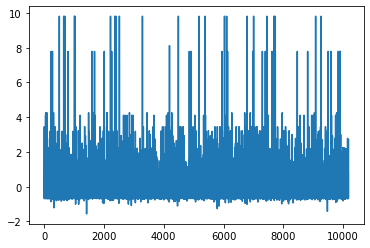

In [235]:
preds = model.predict(TrainX)
TestY
x_pts = np.arange(0,No_of_train_samples,1)
plt.plot(x_pts,preds)

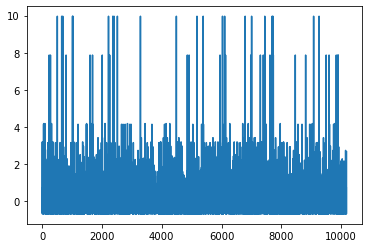

In [236]:
plt.plot(x_pts,TrainY)

In [237]:
TestX.shape

(3395, 80)

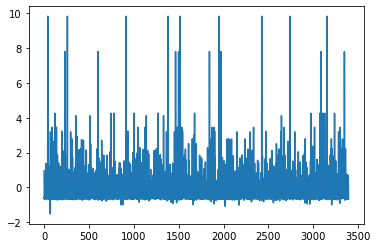

In [238]:
TEST_preds = model.predict(TestX)
x_pts = np.arange(0,X.shape[0] - No_of_train_samples ,1)
plt.plot(x_pts,TEST_preds)

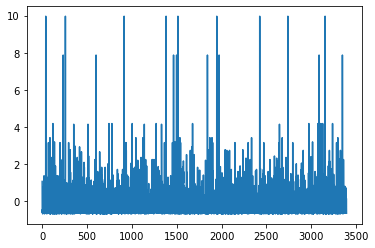

In [239]:
plt.plot(x_pts,TestY)

Inverse transform

In [240]:
TestY_final = scaler_2.inverse_transform(TestY.reshape(-1,1))
TEST_preds_final = scaler_2.inverse_transform(TEST_preds.reshape(-1,1))
TestY_final = TestY_final.reshape(-1)
TEST_preds_final = TEST_preds_final.reshape(-1)

for i in range(TEST_preds_final.shape[0]):
    if TEST_preds_final[i] < 0:
        TEST_preds_final[i] = 0   

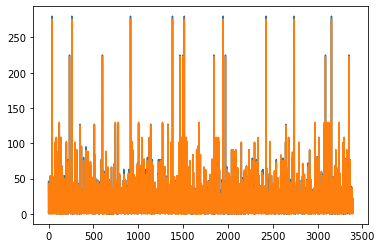

In [241]:
plt.plot(x_pts,TestY_final,TEST_preds_final)

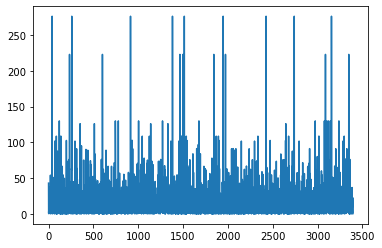

In [242]:
plt.plot(x_pts,TEST_preds_final)

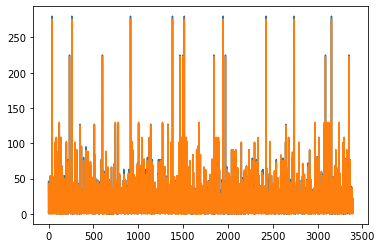

In [243]:
plt.plot(x_pts,TestY_final,TEST_preds_final)

Text(0.5, 1.0, 'Error within and outside tolerance value of 10')

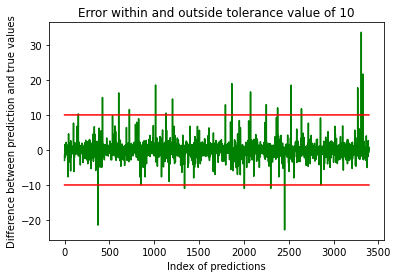

In [244]:
constant_10 = np.full(X.shape[0] - No_of_train_samples ,10)
constant_neg_10 = np.full(X.shape[0] - No_of_train_samples ,-10)
plt.plot(x_pts,TEST_preds_final-TestY_final,color='green')
plt.plot(x_pts,constant_10,color="red")
plt.plot(x_pts,constant_neg_10,color='red')
plt.xlabel("Index of predictions")
plt.ylabel("Difference between prediction and true values")
plt.title("Error within and outside tolerance value of 10")

In [245]:
TestY_final = TestY_final.reshape(-1)
TEST_preds_final = TEST_preds_final.reshape(-1)
print("The shape of the test predictions",TEST_preds_final.shape)
print("The shape of the True values of test",TestY_final.shape)
print("The shape of the ML-model prediction values of Y",Test_old_pred.shape) 

The shape of the test predictions (3395,)
The shape of the True values of test (3395,)
The shape of the ML-model prediction values of Y (3395,)


In [246]:
DL_binary_right_predition = 0
DL_binary_wrong_predition = 0
dl_threshold = 9
for i in range(TEST_preds_final.shape[0]):
    if ((TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10) or (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10)):
        DL_binary_right_predition+=1
    else:
        DL_binary_wrong_predition+=1

In [247]:
print("Prediction ", "True") 
for i in range(TEST_preds_final.shape[0]):
    if not ((TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10) or (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10)):
        if (TEST_preds_final[i]-TestY_final[i] > 10):
            print(TEST_preds_final[i],"  ",TestY_final[i]) 

Prediction  True
11.2852335    1.0
16.984137    2.0
18.28468    2.0
19.540432    1.0
11.541008    1.0
19.552696    5.0
13.895919    1.0
20.934326    2.0
23.572033    7.0
13.954593    1.0
13.01919    1.0
25.480509    7.0
12.766704    1.0
20.75703    3.0000000000000018
42.601284    9.0
21.646248    0.0


In [248]:
dl_acc = DL_binary_right_predition/TestY_final.shape[0] * 100
print("Deep learning accuracy is:", dl_acc)

Deep learning accuracy is: 98.23269513991163


In [249]:
ML_binary_right_predition = 0
ML_binary_wrong_predition = 0
ml_threshold = 0.5
for i in range(TEST_preds_final.shape[0]):
    if ((Test_old_pred[i] >= ml_threshold and TestY_final[i] > 10) or (Test_old_pred[i] < ml_threshold and TestY_final[i] < 10)):
        ML_binary_right_predition+=1
    else:
        ML_binary_wrong_predition+=1

In [250]:
ml_acc = ML_binary_right_predition/TestY_final.shape[0] * 100
print("Machine learning accuracy is:",ml_acc)

Machine learning accuracy is: 90.66273932253314


In [251]:
DL_true_positive = 0
DL_true_negative = 0
DL_false_positive = 0
DL_false_negative = 0
dl_threshold = 10


for i in range(TEST_preds_final.shape[0]):
    
    if (TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10): 
        DL_true_positive+=1
    
    elif (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10):
        DL_true_negative+=1
        
    elif (TEST_preds_final[i] >= dl_threshold and TestY_final[i] < 10):
        DL_false_positive+=1
        
    else:
        DL_false_negative+=1
        
DL_true_positive = DL_true_positive/TestY_final.shape[0] * 100
DL_true_negative = DL_true_negative/TestY_final.shape[0] * 100
DL_false_positive = DL_false_positive/TestY_final.shape[0] * 100
DL_false_negative = DL_false_negative/TestY_final.shape[0] * 100
DL_false_positive

0.8836524300441826

In [252]:
ML_true_positive = 0
ML_true_negative = 0
ML_false_positive = 0
ML_false_negative = 0
ml_threshold = 0.5

for i in range(TEST_preds_final.shape[0]):
    
    if (Test_old_pred[i] >= ml_threshold and TestY_final[i] >= 10): 
        ML_true_positive+=1
    
    elif (Test_old_pred[i] < ml_threshold and TestY_final[i] < 10):
        ML_true_negative+=1
        
    elif (Test_old_pred[i] >= ml_threshold and TestY_final[i] < 10):
        ML_false_positive+=1

    else:
        ML_false_negative+=1
        
ML_true_positive = ML_true_positive/TestY_final.shape[0] * 100
ML_true_negative = ML_true_negative/TestY_final.shape[0] * 100
ML_false_positive = ML_false_positive/TestY_final.shape[0] * 100
ML_false_negative = ML_false_negative/TestY_final.shape[0] * 100
ML_false_positive

0.3240058910162003

In [253]:
ML_false_negative

8.98379970544919

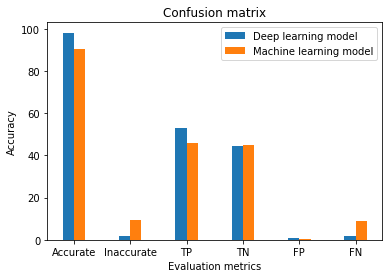

In [258]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Accurate', 'Inaccurate' , 'TP','TN','FP','FN']
dl = [dl_acc, (100 - dl_acc), DL_true_positive,DL_true_negative,DL_false_positive,DL_false_negative]
ml = [ml_acc, (100 - ml_acc), ML_true_positive,ML_true_negative,ML_false_positive,ML_false_negative]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, dl, 0.2, label = 'Deep learning model')
plt.bar(X_axis + 0.1, ml, 0.2, label = 'Machine learning model')
  
plt.xticks(X_axis, X)
plt.xlabel("Evaluation metrics")
plt.ylabel("Accuracy")
plt.title("Confusion matrix")
plt.legend()
plt.show()

In [259]:
DL_0_to_10 = 0
DL_10_to_25 = 0
DL_25_to_50 = 0
DL_50_to_100 = 0
DL_above_100 = 0

for i in range(TEST_preds_final.shape[0]):
    
    
    if (0  <= TEST_preds_final[i] <= 10 and 0 <= TestY_final[i] <= 10):
        DL_0_to_10+=1
    
    elif (10 < TEST_preds_final[i] <= 25 and 10 < TestY_final[i] <= 25): 
        DL_10_to_25+=1
    
    elif (25 < TEST_preds_final[i] <= 50 and 25 < TestY_final[i] <= 50):
        DL_25_to_50+=1
        
    elif(50 < TEST_preds_final[i] <= 100 and 50 < TestY_final[i] <= 100):
        DL_50_to_100+=1
        
    elif((100 < TEST_preds_final[i] and 100 < TestY_final[i])):
        DL_above_100+=1

In [257]:
(DL_0_to_10 + DL_10_to_25 + DL_25_to_50 + DL_50_to_100 + DL_above_100) / TEST_preds_final.shape[0] * 100

96.28865979381443